In [60]:
# Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [61]:
# Import the file 
File = os.path.join('..', 'data', 'raw', 'ai_job_dataset.csv')
df = pd.read_csv(File) 

In [62]:
df.duplicated().sum()

np.int64(0)

In [63]:
df.isnull().any().sum()

np.int64(0)

In [64]:
df[["salary_currency","salary_usd"]]

,salary_currency,salary_usd
0,USD,90376
1,USD,61895
2,USD,152626
3,USD,80215
4,EUR,54624
...,...,...
14995,USD,38604
14996,GBP,57811
14997,USD,189490
14998,EUR,79461


In [65]:
# Step 1: Replace job_id in df with integers
job_id_map = {job_id: i + 1 for i, job_id in enumerate(df['job_id'].unique())}
df['job_id'] = df['job_id'].map(job_id_map)

In [66]:
from collections import Counter

all_skills = []

for skill_list in df["required_skills"]:
    skills = [s.strip() for s in skill_list.split(",")]
    all_skills.extend(skills)

skill_counts = Counter(all_skills)

skills_set = set(all_skills)

# To display the frequencies
dict1 = dict()
for skill, count in skill_counts.items():
    print(f"{skill}: {count}")
    dict1[skill] = count

Tableau: 2341
PyTorch: 2777
Kubernetes: 3009
Linux: 2705
NLP: 2145
Deep Learning: 2189
AWS: 2018
Mathematics: 1943
Python: 4450
Docker: 1862
Java: 2578
Hadoop: 2419
Scala: 2794
SQL: 3407
MLOps: 2164
Data Visualization: 2270
R: 2311
Computer Vision: 2284
Azure: 2144
Git: 2631
GCP: 2442
TensorFlow: 3022
Statistics: 1833
Spark: 2155


In [67]:
skills_df = pd.DataFrame({"skill_id": [i + 1 for i in range(len(skills_set))], "skill": list(skills_set)})


In [68]:
skills_df

,skill_id,skill
0,1,TensorFlow
1,2,Hadoop
2,3,Computer Vision
3,4,Data Visualization
4,5,MLOps
5,6,Azure
6,7,Python
7,8,PyTorch
8,9,Docker
9,10,Java


In [69]:
bridge_table

,job_id,skill_id,required_skills_id
0,13,1,1
1,22,1,2
2,28,1,3
3,30,1,4
4,55,1,5
...,...,...,...
14995,12546,21,14996
14996,12810,21,14997
14997,14980,21,14998
14998,1426,22,14999


In [70]:
jobs2skills_df = pd.DataFrame(columns=['job_id']+list(skills_set))
jobs2skills_df["job_id"] = df['job_id']
jobs2skills_df.head()

for row in range(jobs2skills_df.shape[0]):
    print(f"Checking row: {row+1}")
    for col in range(1, jobs2skills_df.shape[1]):
        if jobs2skills_df.columns[col] in df.iloc[row, 10]:
            jobs2skills_df.iloc[row, col] = 1 
        else:
            jobs2skills_df.iloc[row, col] = 0

jobs2skills_df.head()
    
        #melted_df = jobs2skills_df.melt(id_vars=["job_id"])
#melted_df[ melted_df['job_id'] == "AI00001" ]

Checking row: 1
Checking row: 2
Checking row: 3
Checking row: 4
Checking row: 5
Checking row: 6
Checking row: 7
Checking row: 8
Checking row: 9
Checking row: 10
Checking row: 11
Checking row: 12
Checking row: 13
Checking row: 14
Checking row: 15
Checking row: 16
Checking row: 17
Checking row: 18
Checking row: 19
Checking row: 20
Checking row: 21
Checking row: 22
Checking row: 23
Checking row: 24
Checking row: 25
Checking row: 26
Checking row: 27
Checking row: 28
Checking row: 29
Checking row: 30
Checking row: 31
Checking row: 32
Checking row: 33
Checking row: 34
Checking row: 35
Checking row: 36
Checking row: 37
Checking row: 38
Checking row: 39
Checking row: 40
Checking row: 41
Checking row: 42
Checking row: 43
Checking row: 44
Checking row: 45
Checking row: 46
Checking row: 47
Checking row: 48
Checking row: 49
Checking row: 50
Checking row: 51
Checking row: 52
Checking row: 53
Checking row: 54
Checking row: 55
Checking row: 56
Checking row: 57
Checking row: 58
Checking row: 59
Checki

,job_id,TensorFlow,Hadoop,Computer Vision,Data Visualization,MLOps,Azure,Python,PyTorch,Docker,...,Kubernetes,Deep Learning,Spark,R,Tableau,Linux,GCP,Mathematics,SQL,Git
0,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0
1,2,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,3,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
melted_df = jobs2skills_df.melt(id_vars=["job_id"], var_name="skill")

In [10]:
melted_df

,job_id,skill,value
0,1,TensorFlow,0
1,2,TensorFlow,0
2,3,TensorFlow,0
3,4,TensorFlow,0
4,5,TensorFlow,0
...,...,...,...
359995,14996,Git,0
359996,14997,Git,0
359997,14998,Git,0
359998,14999,Git,0


In [11]:
# Step 3: Filter rows where value == 1
melted_df = melted_df[melted_df['value'] == 1]

# Step 4: Merge with skills_df to get skill_id
bridge_table = melted_df.merge(skills_df, on='skill', how='left')

# Step 5: Select and rename required columns for SQL import
bridge_table = bridge_table[['job_id', 'skill_id']].rename(columns={'skill_id': 'skill_id', 'job_id': 'job_id'})

# Step 6 (optional): Reset index for cleanliness
bridge_table.reset_index(drop=True, inplace=True)


In [12]:
bridge_table[bridge_table['job_id'] == 4]

,job_id,skill_id
14304,4,7
30133,4,13
46766,4,20
53855,4,23


In [40]:
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,1,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,2,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,3,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,4,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,5,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


In [70]:
skills_df

,skill_id,skill
0,0,Linux
1,1,Git
2,2,AWS
3,3,Java
4,4,NLP
5,5,Scala
6,6,MLOps
7,7,Hadoop
8,8,Data Visualization
9,9,Computer Vision


In [41]:
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [105]:
df.columns

Index(['job_id_x', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name', 'industry_id_x', 'company_id_x', 'job_id_y',
       'required_skills_id', 'industry_id_y', 'company_id_y', 'company_id'],
      dtype='object')

In [96]:
skills_df

,skill_id,skill
0,1,Linux
1,2,Git
2,3,AWS
3,4,Java
4,5,NLP
5,6,Scala
6,7,MLOps
7,8,Hadoop
8,9,Data Visualization
9,10,Computer Vision


In [53]:
# Step 1: Filter melted_df for rows where value == 1
filtered_df = melted_df[melted_df['value'] == 1].copy()

# Step 2: Clean skill columns for safe merge
filtered_df['skill'] = filtered_df['skill'].str.strip()
skills_df['skill'] = skills_df['skill'].str.strip()

# Step 3: Merge filtered_df with skills_df on 'skill' to get 'skill_id'
bridge_table = filtered_df.merge(skills_df[['skill', 'skill_id']], on='skill', how='left')

# Step 4: Select only 'job_id' and 'skill_id'
bridge_table = bridge_table[['job_id', 'skill_id']]

# Step 5: Reset index for cleanliness
bridge_table.reset_index(drop=True, inplace=True)

# Step 6: Export to CSV
bridge_table.to_csv('skills_to_job.csv', index=False)


In [92]:
bridge_table

,job_id,skill_id
0,1,1
1,4,1
2,6,1
3,10,1
4,16,1
...,...,...
59888,14980,24
59889,14987,24
59890,14988,24
59891,14997,24


In [13]:
bridge_table


,job_id,skill_id
0,13,1
1,22,1
2,28,1
3,30,1
4,55,1
...,...,...
59888,14979,24
59889,14980,24
59890,14981,24
59891,14989,24


In [14]:
skills_df

,skill_id,skill
0,1,TensorFlow
1,2,Hadoop
2,3,Computer Vision
3,4,Data Visualization
4,5,MLOps
5,6,Azure
6,7,Python
7,8,PyTorch
8,9,Docker
9,10,Java


In [54]:
import os
import pandas as pd

# Export path
export_folder = r'C:\Users\toloz\Ironhack\Week 4\Project\first_project\data\clean'

# 1. Company Table — keep industry name as is, no merging
company = (
    df[['company_location', 'company_name', 'company_size', 'industry']]
    .drop_duplicates()
    .reset_index(drop=True)
)
company['company_id'] = company.index + 1

# 2. Skills-to-Job Bridge Table
skills_to_job = bridge_table.copy()
skills_to_job["required_skill_id"] = skills_to_job.index + 1
skills_to_job = skills_to_job[["required_skill_id", "skill_id", "job_id"]]

# 3. Required Skills ID per job from bridge_table directly (not skills_to_job)
bridge_table = bridge_table.drop_duplicates(subset=['job_id']).reset_index(drop=True)
bridge_table['required_skills_id'] = bridge_table.index + 1

# 4. Merge company_id into df
df = df.drop(columns=['company_id'], errors='ignore')
df = df.merge(company, on=['company_location', 'company_name', 'company_size', 'industry'], how='left')

# 5. Drop existing required_skills_id if present
df = df.drop(columns=['required_skills_id'], errors='ignore')

# 6. Merge required_skills_id into df
df = df.merge(bridge_table[['job_id', 'required_skills_id']], on='job_id', how='left')


# 7. Job Table
job = df[['job_id', 'job_title', 'salary_usd', 'education_required', 'employment_type',
          'experience_level', 'years_experience', 'company_id', 'remote_ratio', 'required_skills_id',
          'salary_currency', 'posting_date', 'benefits_score', 'employee_residence']].copy()


# 8. Industry Table — separately, unique industries with IDs
industry_df = pd.DataFrame({'industry': df['industry'].unique()})
industry_df = industry_df.reset_index()
industry_df['industry_id'] = industry_df['index'] + 1
industry_df = industry_df.drop(columns='index')

# --- EXPORT ---
company.to_csv(os.path.join(export_folder, 'company.csv'), index=False, encoding='utf-8', lineterminator='\n')
job.to_csv(os.path.join(export_folder, 'job.csv'), index=False, encoding='utf-8', lineterminator='\n')
skills_df.to_csv(os.path.join(export_folder, 'skills.csv'), index=False, encoding='utf-8', lineterminator='\n')
industry_df.to_csv(os.path.join(export_folder, 'industry.csv'), index=False, encoding='utf-8', lineterminator='\n')
skills_to_job.to_csv(os.path.join(export_folder, 'skills_to_job.csv'), index=False, encoding='utf-8', lineterminator='\n')


0        False
1        False
2        False
3        False
4        False
         ...  
59888    False
59889    False
59890    False
59891    False
59892    False
Name: job_id, Length: 59893, dtype: bool

In [57]:
import os
import pandas as pd

# Export path
export_folder = r'C:\Users\toloz\Ironhack\Week 4\Project\first_project\data\clean'

# 1. Company Table — keep industry name as is, no merging yet
company = (
    df[['company_location', 'company_name', 'company_size', 'industry']]
    .drop_duplicates()
    .reset_index(drop=True)
)
company['company_id'] = company.index + 1

# 2. Skills-to-Job Bridge Table
skills_to_job = bridge_table.copy()
skills_to_job["required_skill_id"] = skills_to_job.index + 1
skills_to_job = skills_to_job[["required_skill_id", "skill_id", "job_id"]]

# 3. Required Skills ID per job from bridge_table directly (not skills_to_job)
bridge_table = bridge_table.drop_duplicates(subset=['job_id']).reset_index(drop=True)
bridge_table['required_skills_id'] = bridge_table.index + 1

# 4. Merge company_id into df
df = df.drop(columns=['company_id'], errors='ignore')
df = df.merge(company, on=['company_location', 'company_name', 'company_size', 'industry'], how='left')

# 5. Drop existing required_skills_id if present
df = df.drop(columns=['required_skills_id'], errors='ignore')

# 6. Merge required_skills_id into df
df = df.merge(bridge_table[['job_id', 'required_skills_id']], on='job_id', how='left')

# 7. Job Table
job = df[['job_id', 'job_title', 'salary_usd', 'education_required', 'employment_type',
          'experience_level', 'years_experience', 'company_id', 'remote_ratio', 'required_skills_id',
          'salary_currency', 'posting_date', 'benefits_score', 'employee_residence']].copy()

# 8. Industry Table — create unique industries with IDs
industry_df = pd.DataFrame({'industry': df['industry'].unique()})
industry_df = industry_df.reset_index()
industry_df['industry_id'] = industry_df['index'] + 1
industry_df = industry_df.drop(columns='index')

# 🔧 Merge industry_id into company
company = company.merge(industry_df, on='industry', how='left')
company = company[['company_location', 'company_name', 'company_size', 'industry_id', 'company_id','industry']]

# --- Remove duplicates before export ---
company = company.drop_duplicates()
job = job.drop_duplicates()
skills_df = skills_df.drop_duplicates()
industry_df = industry_df.drop_duplicates()
skills_to_job = skills_to_job.drop_duplicates()

# --- EXPORT ---
company.to_csv(os.path.join(export_folder, 'company.csv'), index=False, encoding='utf-8', lineterminator='\n')
job.to_csv(os.path.join(export_folder, 'job.csv'), index=False, encoding='utf-8', lineterminator='\n')
skills_df.to_csv(os.path.join(export_folder, 'skills.csv'), index=False, encoding='utf-8', lineterminator='\n')
industry_df.to_csv(os.path.join(export_folder, 'industry.csv'), index=False, encoding='utf-8', lineterminator='\n')
skills_to_job.to_csv(os.path.join(export_folder, 'skills_to_job.csv'), index=False, encoding='utf-8', lineterminator='\n')


In [58]:
bridge_table

,job_id,skill_id,required_skills_id
0,13,1,1
1,22,1,2
2,28,1,3
3,30,1,4
4,55,1,5
...,...,...,...
14995,12546,21,14996
14996,12810,21,14997
14997,14980,21,14998
14998,1426,22,14999


In [59]:
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name', 'company_id_x', 'required_skills_id_x', 'company_id_y',
       'required_skills_id_y', 'industry_id_x', 'industry_id_y', 'company_id',
       'required_skills_id'],
      dtype='object')

In [71]:
df['required_skills']

0               Tableau, PyTorch, Kubernetes, Linux, NLP
1        Deep Learning, AWS, Mathematics, Python, Docker
2           Kubernetes, Deep Learning, Java, Hadoop, NLP
3                              Scala, SQL, Linux, Python
4                           MLOps, Java, Tableau, Python
                              ...                       
14995                            Java, Kubernetes, Azure
14996            Mathematics, Docker, SQL, Deep Learning
14997                                  Scala, Spark, NLP
14998          Java, Computer Vision, Python, TensorFlow
14999      Scala, Azure, Deep Learning, GCP, Mathematics
Name: required_skills, Length: 15000, dtype: object

In [72]:
import pandas as pd

# Assuming your DataFrame is called df
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist', 'AI Consultant', 'AI Specialist']

# Filter only relevant job titles
filtered_df = df[df['job_title'].isin(job_titles)].copy()

# Split required_skills into list
filtered_df['required_skills'] = filtered_df['required_skills'].fillna('').apply(lambda x: [s.strip() for s in x.split(',')])

# Explode the skills list into separate rows
exploded = filtered_df.explode('required_skills')

# Group by job title and skill, then calculate count and avg salary
skill_stats = exploded.groupby(['job_title', 'required_skills']).agg(
    skill_count=('required_skills', 'count'),
    avg_salary_usd=('salary_usd', 'mean')
).reset_index()

# Rank top 5 skills by job title
skill_stats['rank'] = skill_stats.groupby('job_title')['skill_count'].rank(method='first', ascending=False)

# Keep top 5 per job title
top_skills = skill_stats[skill_stats['rank'] <= 5].sort_values(['job_title', 'skill_count'], ascending=[True, False])

# Display
print(top_skills[['job_title', 'required_skills', 'skill_count', 'avg_salary_usd']])


          job_title required_skills  skill_count  avg_salary_usd
16    AI Consultant          Python          184   109178.032609
18    AI Consultant             SQL          153   109366.875817
15    AI Consultant         PyTorch          144   110262.770833
10    AI Consultant      Kubernetes          141   112718.581560
9     AI Consultant            Java          136   120789.169118
40    AI Specialist          Python          192   116526.187500
42    AI Specialist             SQL          161   118108.440994
39    AI Specialist         PyTorch          151   114144.642384
47    AI Specialist      TensorFlow          148   112974.668919
34    AI Specialist      Kubernetes          143   114815.797203
64     Data Analyst          Python          222   113109.689189
58     Data Analyst      Kubernetes          166   109618.506024
66     Data Analyst             SQL          166   112272.337349
59     Data Analyst           Linux          165   105597.921212
71     Data Analyst      

C:\Users\toloz\AppData\Local\Temp\ipykernel_15664\696092534.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\toloz\AppData\Local\Temp\ipykernel_15664\696092534.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\toloz\AppData\Local\Temp\ipykernel_15664\696092534.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\toloz\AppData\Local\Temp\ipykernel_15664\696092534.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` 

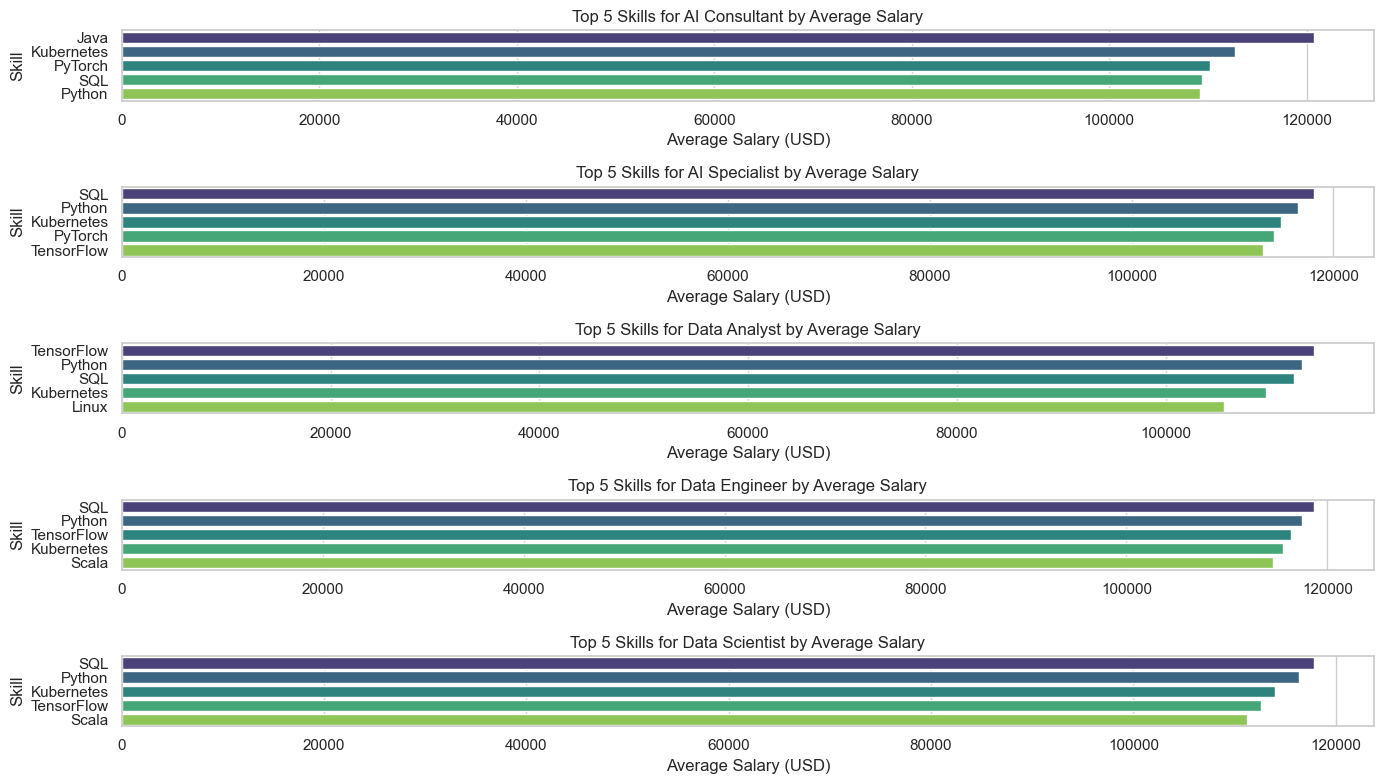

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
job_titles = top_skills['job_title'].unique()

for i, job in enumerate(job_titles, 1):
    plt.subplot(len(job_titles), 1, i)
    subset = top_skills[top_skills['job_title'] == job]
    sns.barplot(
        data=subset,
        y='required_skills',
        x='avg_salary_usd',
        palette='viridis',
        order=subset.sort_values('avg_salary_usd', ascending=False)['required_skills']
    )
    plt.title(f"Top 5 Skills for {job} by Average Salary")
    plt.xlabel("Average Salary (USD)")
    plt.ylabel("Skill")

plt.tight_layout()
plt.savefig('top_skills_avg_salary.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\toloz\AppData\Local\Temp\ipykernel_15664\2874099421.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


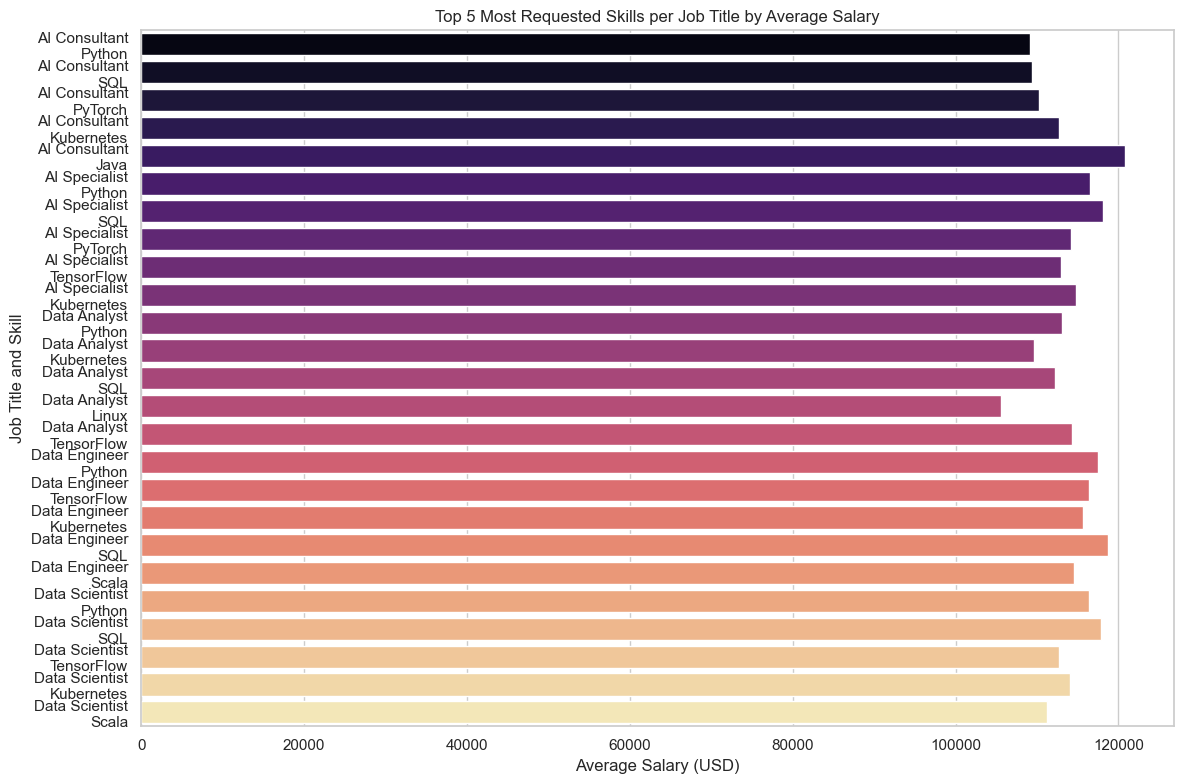

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort top skills by job_title and skill_count descending
top_skills_sorted = top_skills.sort_values(['job_title', 'skill_count'], ascending=[True, False])

plt.figure(figsize=(12, 8))

# Use job_title and required_skills combined as y-axis labels with line breaks for clarity
top_skills_sorted['y_labels'] = top_skills_sorted['job_title'] + "\n" + top_skills_sorted['required_skills']

sns.barplot(
    data=top_skills_sorted,
    y='y_labels',
    x='avg_salary_usd',
    palette='magma'
)

plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title and Skill')
plt.title('Top 5 Most Requested Skills per Job Title by Average Salary')
plt.tight_layout()
plt.show()

